In [37]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister, Aer
import qiskit
from qiskit.circuit.library import QFT

In [81]:
def set_inputs_state(a,b):
    get_binary = lambda x: '{0:{fill}3b}'.format(x,fill = '0')

    r_a = QuantumRegister(4,'a')
    r_b = QuantumRegister(4,'b')
    cr = ClassicalRegister(4,'c')
    qc = QuantumCircuit(r_a,r_b, cr)
    
    a_binary = get_binary(a)
    b_binary = get_binary(b)
    
    for i in range(3):
        if a_binary[i] == '1':
            qc.x(r_a[2-i])
        if b_binary[i] == '1':
            qc.x(r_b[2-i])
            
    return qc, r_a, r_b, cr

In [82]:
def control_rotation(qc,reg_a, reg_b, n):
    for i in range(0, n+1):
        qc.cp(np.pi/2**i, reg_b[n-i],reg_a[n])

In [94]:
a = 1
b = 7
qc, r_a, r_b, cr = set_inputs_state(a,b)
qc.append(QFT(4,do_swaps = False), [3,2,1,0])
for i in range(0,4):
    control_rotation(qc, r_a, r_b, 3-i)
qc.append(QFT(4,do_swaps = False), [3,2,1,0])    
qc.measure(r_a,cr)

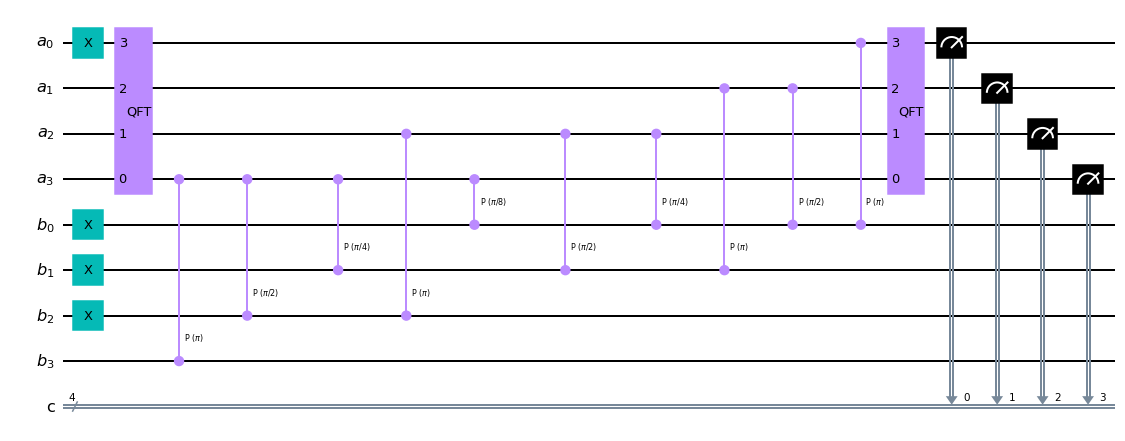

In [95]:
qc.draw('mpl')

In [96]:
backend = Aer.get_backend('qasm_simulator')
job = qiskit.execute(qc, backend, shots = 100)

In [97]:
result = job.result()
counts_a = result.get_counts(qc)
print(counts_a)

{'0100': 1, '0110': 1, '1010': 38, '1000': 50, '1110': 4, '0010': 2, '0000': 1, '1100': 3}


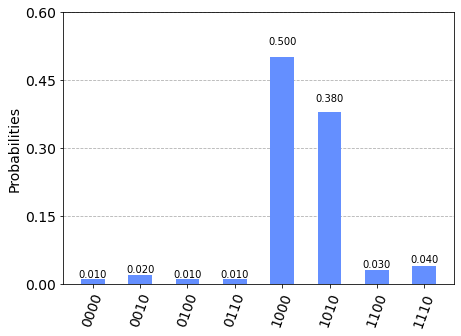

In [99]:
qiskit.visualization.plot_histogram(counts_a)